In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cic_ddos2019 = {
    'dataset_syn' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\Syn-training.parquet', engine='fastparquet'),
    'dataset_udp' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\UDP-training.parquet', engine='fastparquet'),
    'dataset_MSSQL' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\MSSQL-training.parquet', engine='fastparquet'),
    'dataset_LDAP' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\LDAP-training.parquet', engine='fastparquet'),
    'dataset_Portmap' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\Portmap-training.parquet', engine='fastparquet'),
    'dataset_NetBIOS' : pd.read_parquet(r'C:\Users\RACYM\Desktop\M2_PFE\datasets\CIC-DDoS2019\NetBIOS-training.parquet', engine='fastparquet')
}

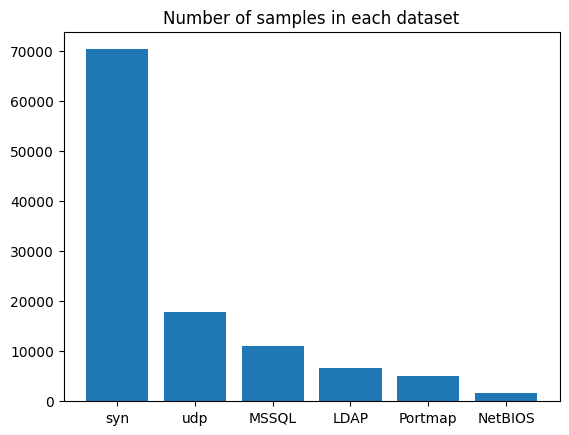

In [4]:
plt.bar([datasetname.removeprefix('dataset_') for datasetname in cic_ddos2019.keys()], [len(dataset) for dataset in cic_ddos2019.values()])
plt.title('Number of samples in each dataset')
plt.show()

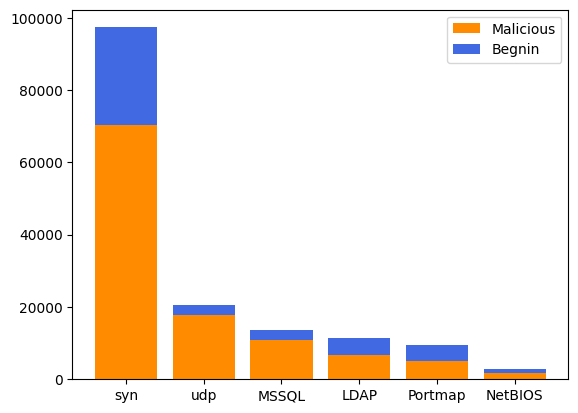

In [5]:
dataset_names = [datasetname.removeprefix('dataset_') for datasetname in cic_ddos2019.keys()]

w = 0.8
benginForEachDataset = [dataset.Label.value_counts()['Benign'] for dataset in cic_ddos2019.values()]
malicousForEachDataset = [dataset.Label.count() for dataset in cic_ddos2019.values()]


plt.bar(dataset_names, malicousForEachDataset, w, label='Malicious', color='darkorange')
plt.bar(dataset_names, benginForEachDataset, w, bottom=malicousForEachDataset, label='Begnin', color='royalblue')
plt.legend()
plt.show()


In [6]:
cic_ddos2019['dataset_syn'].head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,105,2,2,12.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
1,6,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
2,6,55295858,8,0,48.0,0.0,6.0,6.0,6.0,0.0,...,20,1.0,0.0,1.0,1.0,18431952.0,4641289.0,22000140.0,13184826.0,Syn
3,6,49,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
4,6,109,2,2,12.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn


In [ ]:
cic_ddos2019['dataset_syn'].info()

In [ ]:
cic_ddos2019['dataset_syn'].columns       #78 columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [15]:
cic_ddos2019['dataset_syn'].Label.value_counts()

Label
Syn       43302
Benign    27034
Name: count, dtype: int64

In [16]:
# merge all datasets in cic_ddos2019 into one
cic_ddos2019['dataset_syn']['Attack'] = 'Syn'
cic_ddos2019['dataset_udp']['Attack'] = 'UDP'
cic_ddos2019['dataset_MSSQL']['Attack'] = 'MSSQL'
cic_ddos2019['dataset_LDAP']['Attack'] = 'LDAP'
cic_ddos2019['dataset_Portmap']['Attack'] = 'Portmap'
cic_ddos2019['dataset_NetBIOS']['Attack'] = 'NetBIOS'

cic_ddos2019_all = pd.concat(cic_ddos2019.values(), ignore_index=True)

cic_ddos2019_all.Label.value_counts()

Label
Syn        43302
Benign     42679
UDP        14792
MSSQL       8523
LDAP        1906
Portmap      685
NetBIOS      644
Name: count, dtype: int64